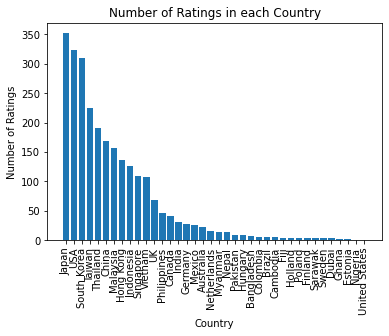

In [27]:
#Q1. Make a bar chart that represents the number of ratings each country receives. The result should look like this:
#(The order of the countries does not matter for this question. It can be in any order as long as the count of ratings
 #each country receive is correctly plotted on the chart. )
    
import pandas as pd
import matplotlib.pyplot as plt

indata = pd.read_csv("ramen-ratings.csv")
plotseries = indata['Country'].value_counts()
X_axis  = plotseries.index
Y_axis =plotseries.values
plt.bar(X_axis,Y_axis)
plt.xticks(rotation='vertical')
plt.xlabel("Country")
plt.ylabel("Number of Ratings")
plt.title("Number of Ratings in each Country")
plt.show()

In [28]:
#Q2. Using panda’s groupby() and mean(), find the average rating of each country. 
#Plot the results as a bar chart in descending order of the average ratings. The result should look like this:
import pandas as pd
df = pd.read_csv('ramen-ratings.csv')
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [29]:
df.dtypes

df['Stars'] = df['Stars'].apply(lambda x:0 if x=='Unrated' else x)

df['Stars'] = pd.to_numeric(df['Stars'], downcast="float")

df.dtypes


Review #      int64
Brand        object
Variety      object
Style        object
Country      object
Stars       float32
Top Ten      object
dtype: object

In [30]:
df1 = df.groupby('Country')['Stars'].mean().reset_index().sort_values('Stars',ascending=False)

In [31]:
df1

,Country,Stars
2,Brazil,4.350000
28,Sarawak,4.333333
3,Cambodia,4.200000
19,Malaysia,4.127564
29,Singapore,4.126147
17,Indonesia,4.067461
18,Japan,3.981605
21,Myanmar,3.946429
9,Fiji,3.875000
14,Hong Kong,3.801825


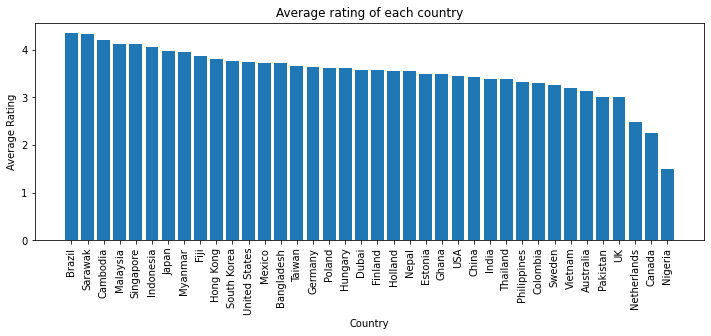

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

# creating the bar plot
plt.bar(df1['Country'],df1['Stars'])

  
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.title("Average rating of each country")

plt.show()



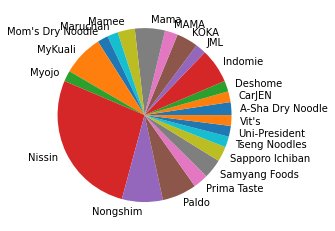

In [50]:
#Q3. Make a pie chart that shows the percentage of each brand that makes up of all 
#the 5-star ratings. Exclude brands that have less than five 5-star ratings.  In other words, 
#the pie chart should include brands that have been rated 5 star for at least 5 times. 
#The result should look like this:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ramen-ratings.csv')
# Filtering df for ratings with 5 stars.
df = df[df['Stars'] == '5']

# Grouping by brands
df = df.groupby('Brand').count()

# Filtering brands rated 5 star for atleast 5 times.  
df = df[df['Stars'] >4]

df.reset_index(level=0, inplace=True)
plt.pie(df['Stars'], labels=df['Brand'])
plt.show()